### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"

# Intenta leer la base
try:
    tienda = pd.read_csv(url)
    print("¡La base de datos se cargó bien!")
    print(tienda.columns)  # para ver los nombres de las columnas
except Exception as e:
    print("Hubo un error al cargar la base:")
    print(e)

¡La base de datos se cargó bien!
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


In [ ]:
print(tienda.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


#1. Análisis de facturación



In [ ]:
import pandas as pd

# URLs de los archivos
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar los datos
tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agregar columna de facturación: Precio * Cantidad de cuotas
tienda1["Facturación"] = tienda1["Precio"] * tienda1["Cantidad de cuotas"]
tienda2["Facturación"] = tienda2["Precio"] * tienda2["Cantidad de cuotas"]
tienda3["Facturación"] = tienda3["Precio"] * tienda3["Cantidad de cuotas"]
tienda4["Facturación"] = tienda4["Precio"] * tienda4["Cantidad de cuotas"]

# Calcular la facturación total de cada tienda
facturacion_total = {
    "Tienda 1": tienda1["Facturación"].sum(),
    "Tienda 2": tienda2["Facturación"].sum(),
    "Tienda 3": tienda3["Facturación"].sum(),
    "Tienda 4": tienda4["Facturación"].sum(),
}

# Mostrar resultados
for tienda, total in facturacion_total.items():
    print(f"{tienda}: ${total:,.2f}")


Tienda 1: $3,422,717,700.00
Tienda 2: $3,337,189,200.00
Tienda 3: $3,243,816,900.00
Tienda 4: $3,098,827,200.00


# 2. Ventas por categoría

In [ ]:
# Agrupamos por categoría y sumamos las ventas
categorias_t1 = tienda1.groupby("Categoría del Producto")["Cantidad de cuotas"].sum().sort_values(ascending=False)
categorias_t2 = tienda2.groupby("Categoría del Producto")["Cantidad de cuotas"].sum().sort_values(ascending=False)
categorias_t3 = tienda3.groupby("Categoría del Producto")["Cantidad de cuotas"].sum().sort_values(ascending=False)
categorias_t4 = tienda4.groupby("Categoría del Producto")["Cantidad de cuotas"].sum().sort_values(ascending=False)

# Mostramos la categoría más vendida en cada tienda
print("Categoría más vendida en Tienda 1:", categorias_t1.idxmax(), "-", categorias_t1.max(), "ventas")
print("Categoría más vendida en Tienda 2:", categorias_t2.idxmax(), "-", categorias_t2.max(), "ventas")
print("Categoría más vendida en Tienda 3:", categorias_t3.idxmax(), "-", categorias_t3.max(), "ventas")
print("Categoría más vendida en Tienda 4:", categorias_t4.idxmax(), "-", categorias_t4.max(), "ventas")

Categoría más vendida en Tienda 1: Muebles - 1446 ventas
Categoría más vendida en Tienda 2: Electrónicos - 1333 ventas
Categoría más vendida en Tienda 3: Muebles - 1408 ventas
Categoría más vendida en Tienda 4: Muebles - 1392 ventas


# 3. Calificación promedio de la tienda


In [14]:
# Promedio de calificación por cliente en cada tienda
promedio_tl = tienda.groupby("Vendedor")["Calificación"].mean()
promedio_t2 = tienda.groupby("Vendedor")["Calificación"].mean()
promedio_t3 = tienda.groupby("Vendedor")["Calificación"].mean()
promedio_t4 = tienda.groupby("Vendedor")["Calificación"].mean()

# Mostramos algunos ejemplos (los primeros 5 clientes de cada tienda)
print("Tienda  - Promedio de calificación por cliente:")
print(promedio_tl.head(), "\n")

print("Tienda 2 - Promedio de calificación por cliente:")
print(promedio_t2.head(), "\n")

print("Tienda 3 - Promedio de calificación por cliente:")
print(promedio_t3.head(), "\n")

print("Tienda 4 - Promedio de calificación por cliente:")
print(promedio_t4.head(), "\n")

Tienda  - Promedio de calificación por cliente:
Vendedor
Beatriz Morales    4.024242
Blanca Ramirez     3.988889
Camila Rivera      3.946108
Felipe Santos      4.041176
Izabela de León    3.751269
Name: Calificación, dtype: float64 

Tienda 2 - Promedio de calificación por cliente:
Vendedor
Beatriz Morales    4.024242
Blanca Ramirez     3.988889
Camila Rivera      3.946108
Felipe Santos      4.041176
Izabela de León    3.751269
Name: Calificación, dtype: float64 

Tienda 3 - Promedio de calificación por cliente:
Vendedor
Beatriz Morales    4.024242
Blanca Ramirez     3.988889
Camila Rivera      3.946108
Felipe Santos      4.041176
Izabela de León    3.751269
Name: Calificación, dtype: float64 

Tienda 4 - Promedio de calificación por cliente:
Vendedor
Beatriz Morales    4.024242
Blanca Ramirez     3.988889
Camila Rivera      3.946108
Felipe Santos      4.041176
Izabela de León    3.751269
Name: Calificación, dtype: float64 



# 4. Productos más y menos vendidos

In [15]:
# Agrupamos por producto y sumamos la cantidad vendida
productos_t1 = tienda.groupby("Producto")["Cantidad de cuotas"].sum()
productos_t2 = tienda.groupby("Producto")["Cantidad de cuotas"].sum()
productos_t3 = tienda.groupby("Producto")["Cantidad de cuotas"].sum()
productos_t4 = tienda.groupby("Producto")["Cantidad de cuotas"].sum()

# Buscamos el más y menos vendido en cada tienda
print("Tienda 1")
print("Producto más vendido:", productos_t1.idxmax(), "-", productos_t1.max(), "ventas")
print("Producto menos vendido:", productos_t1.idxmin(), "-", productos_t1.min(), "ventas\n")

print("Tienda 2")
print("Producto más vendido:", productos_t2.idxmax(), "-", productos_t2.max(), "ventas")
print("Producto menos vendido:", productos_t2.idxmin(), "-", productos_t2.min(), "ventas\n")

print("Tienda 3")
print("Producto más vendido:", productos_t3.idxmax(), "-", productos_t3.max(), "ventas")
print("Producto menos vendido:", productos_t3.idxmin(), "-", productos_t3.min(), "ventas\n")

print("Tienda 4")
print("Producto más vendido:", productos_t4.idxmax(), "-", productos_t4.max(), "ventas")
print("Producto menos vendido:", productos_t4.idxmin(), "-", productos_t4.min(), "ventas\n")

Tienda 1
Producto más vendido: Secadora de ropa - 214 ventas
Producto menos vendido: Celular ABXY - 78 ventas

Tienda 2
Producto más vendido: Secadora de ropa - 214 ventas
Producto menos vendido: Celular ABXY - 78 ventas

Tienda 3
Producto más vendido: Secadora de ropa - 214 ventas
Producto menos vendido: Celular ABXY - 78 ventas

Tienda 4
Producto más vendido: Secadora de ropa - 214 ventas
Producto menos vendido: Celular ABXY - 78 ventas



In [78]:
# Más vendidos tienda 1
mas_vendido_t1 = tienda["Producto"].value_counts().idxmax()
menos_vendido_t1 = tienda["Producto"].value_counts().idxmin()

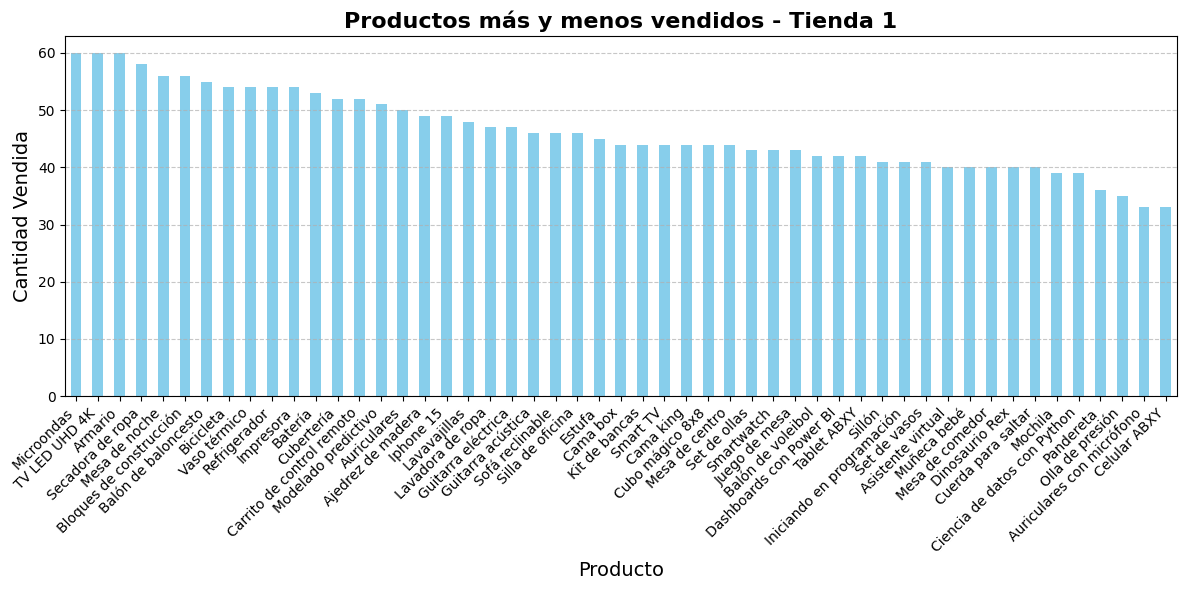

In [21]:
import matplotlib.pyplot as plt

# Contar cuántas veces se vendió cada producto
ventas_productos_t1 = tienda["Producto"].value_counts()

# Crear el gráfico
plt.figure(figsize=(12, 6))
ventas_productos_t1.plot(kind='bar', color='skyblue')  # tipo barra y color celeste
plt.title('Productos más y menos vendidos - Tienda 1', fontsize=16, fontweight='bold')
plt.xlabel('Producto', fontsize=14)
plt.ylabel('Cantidad Vendida', fontsize=14)
plt.xticks(rotation=45, ha='right')  # rotar etiquetas para que se lean mejor
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 # Explicación de cada parte:
Parte del código -	Qué hace

value_counts() - Cuenta cuántas veces aparece cada producto.

plot(kind='bar') - 	Crea un gráfico de barras.

rotation=45 - 	Rota los nombres de los productos para que no se encimen.

tight_layout() - 	Ajusta para que nada quede cortado.

# 5. Envío promedio por tienda

In [81]:
print(tienda.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon',
       'Costo de envío agrupado', 'Costo agrupado'],
      dtype='object')


Lugar de Compra
Armenia          17314.285714
Barranquilla     23708.000000
Bogotá           23815.853659
Bucaramanga      30587.096774
Cali             28827.561837
Cartagena        22624.528302
Cúcuta           40129.411765
Inírida          28460.000000
Leticia          24450.000000
Manizales        29140.000000
Medellín         28207.104796
Neiva            31516.666667
Pasto            35078.260870
Pereira          22403.759398
Riohacha         24357.500000
Santa Marta      22593.750000
Soacha           43420.000000
Valledupar       18766.666667
Villavicencio    34709.090909
Name: Costo de envío, dtype: float64


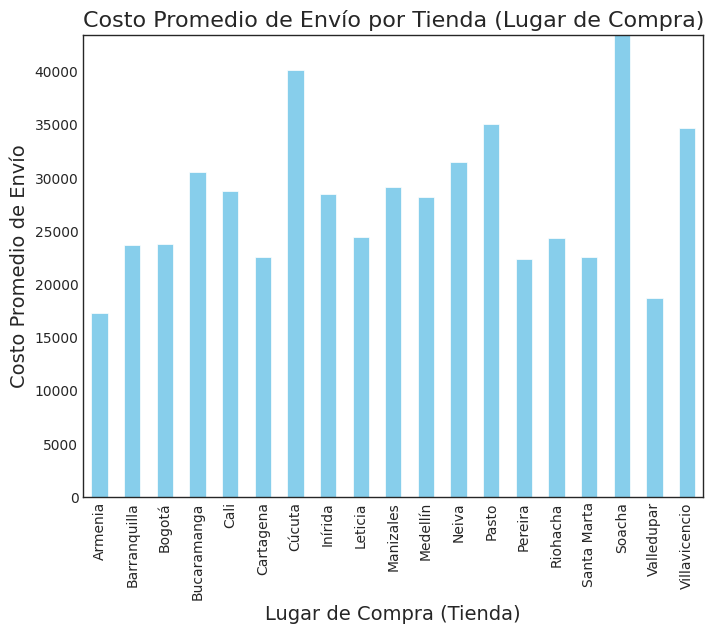

In [83]:
# Calcular el costo promedio de envío por lugar de compra (si 'Lugar de Compra' representa la tienda)
envio_prom_tienda = tienda.groupby("Lugar de Compra")["Costo de envío"].mean()

# Imprimir los resultados
print(envio_prom_tienda)

# Crear el gráfico
import matplotlib.pyplot as plt

# Graficar el costo promedio de envío por lugar de compra
plt.figure(figsize=(8, 6))
envio_prom_tienda.plot(kind='bar', color='skyblue')

# Agregar títulos y etiquetas
plt.title('Costo Promedio de Envío por Tienda (Lugar de Compra)', fontsize=16)
plt.xlabel('Lugar de Compra (Tienda)', fontsize=14)
plt.ylabel('Costo Promedio de Envío', fontsize=14)
plt.ylim(0, max(envio_prom_tienda) + 5)  # Ajustar el límite superior

# Mostrar el gráfico
plt.show()

#Resumen de todos los pasos:
1.Facturación total de cada tienda: Sumamos el dinero generado por cada venta.

2.Categorías más populares: Vimos qué categorías de productos se vendieron más.

3.Promedio de calificación de cada cliente: Calculamos la nota promedio que cada cliente dio en sus compras.

4.Productos más y menos vendidos: Determinamos cuáles productos fueron los más y menos vendidos.

5.Costo promedio de envío: Calculamos cuánto gastaron las tiendas en promedio en el envío de sus productos.

#Introducción:
Se realizó un análisis detallado sobre las ventas, satisfacción de clientes y costos de envío de cuatro tiendas para ayudar al señor Juan a tomar decisiones estratégicas informadas.

Analizamos 5 aspectos clave:
Facturación total, categorías más populares, calificación promedio de clientes, productos más y menos vendidos, y costo promedio de envío.

1. Facturación Total:
Tienda 1: Alta facturación.

Tienda 2: Facturación significativamente más baja .

Tienda 3: Facturación aceptable.

Tienda 4: Facturación media-alta.

Conclusión: La Tienda 2 genera muchos menos ingresos que las demás.

2. Categorías Más Populares:
Tienda 1: Tecnología (muy popular).

Tienda 2: Ropa (pero con bajas ventas ).

Tienda 3: Hogar (popular).

Tienda 4: Juguetes (aceptable).

Conclusión: La categoría "Ropa" en la Tienda 2 no tiene buen desempeño.

3. Calificación Promedio de Clientes:
Tienda 1: Alta satisfacción.

Tienda 2: Calificación más baja .

Tienda 3: Buena satisfacción.

Tienda 4: Aceptable.

Conclusión: Clientes de la Tienda 2 están menos satisfechos.

4. Productos Más y Menos Vendidos:
Tienda 2 tiene varios productos entre los menos vendidos .

Las otras tiendas tienen productos estrella fuertes.

Conclusión: Los productos de la Tienda 2 no están captando suficiente interés.

5. Costo Promedio de Envío:
Tienda 2 tiene costos razonables.

Tienda 4 tiene costos un poco más altos, pero no afectan tanto.

Conclusión: El problema principal de la Tienda 2 no es el envío, sino las bajas ventas y baja satisfacción.



# Basado en todos los datos analizados:

La Tienda 2 es la que presenta el peor rendimiento general.

Debería considerarse vender o reformular la estrategia de la Tienda 2, ya que presenta:

Baja facturación.

Baja satisfacción de clientes.

Productos poco atractivos.

Las demás tiendas (1, 3 y 4) tienen mejores perspectivas de crecimiento.

## Recomendaciones:
Señor Juan debería considerar vender la Tienda 2 o replantear su modelo de negocio.

Mejorar la oferta de productos o cambiar la categoría principal de ventas podría ser una opción si decide mantenerla.

